<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-2/blob/main/Clarito_Assignment_7_1_Classifications_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 7.1 : Classifications and Regression.ipynb** |
**Members:** | Clarito, Vincent Maverick
**Section** | CPE32S9
**Date Performed**: | 04/13/2024
**Date Submitted**: | 04/13/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

Instructions:

Choose any dataset applicable to the classification problem, and also, choose any dataset applicable to the regression problem.

Explain your datasets and the problem being addressed.

1.   For classification, do the following:
  * Create a base model
  * Evaluate the model with k-fold cross validation
  * Improve the accuracy of your model by applying additional hidden layers

2.   For regression, do the following:
  * Create a base model
  * Improve the model by standardizing the dataset
  * Show tuning of layers and neurons (see evaluating small and larger networks)

Submit the link to your Google Colab (make sure that it is accessible to me)




In [76]:
!pip install scikeras

# **1. Classification**

Here is all the libraries & dependencies I used for this part:

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Explanation:**
This dataset shows and compares the acidity of white and red wine variants from the country Portugal. This will help me determine which type of wine has greater acidity, ph level, and alcohol percentage.

In [78]:
white = pd.read_csv("/content/drive/My Drive/Datasets/winequality-white.csv", sep=';')
red = pd.read_csv("/content/drive/My Drive/Datasets/winequality-red.csv", sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [79]:
pd.isnull(red).count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [80]:
pd.isnull(white).count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

**Comments:**
> This shows that the dataset doesn't have any missing values.

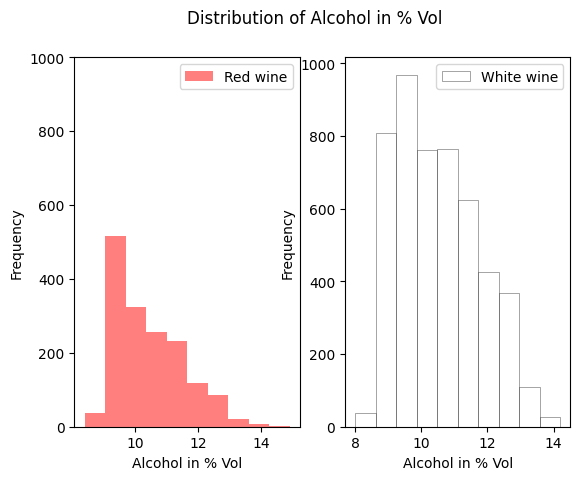

In [81]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

**Comments:**
> In this graph, it shows that the percentage of alcohol on white wines is greater than the red wines.

In [82]:
red['type'] = 1
white['type'] = 0

# Concatenate red and white DataFrames using pd.concat
wines = pd.concat([red, white], ignore_index=True)
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [83]:
X=wines.iloc[:,0:11]
y= np.ravel(wines.type)
#y= wines.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [86]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
wine_history = model.fit(X_train, y_train,epochs=20, validation_data=(X_test_norm, y_test))

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7608 - loss: 0.5375 - val_accuracy: 0.7426 - val_loss: 0.4871
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.4429 - val_accuracy: 0.7426 - val_loss: 0.3386
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8304 - loss: 0.2896 - val_accuracy: 0.9790 - val_loss: 0.2140
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.1772 - val_accuracy: 0.9856 - val_loss: 0.1498
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.1250 - val_accuracy: 0.9851 - val_loss: 0.1152
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9901 - loss: 0.0965 - val_accuracy: 0.9867 - val_loss: 0.0949
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0740 - val_accuracy: 0.9872 - val_loss: 0.0817
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9931 - loss: 0.0624 - val_accuracy: 0.

**Comments:**
> I noticed that it gradually increased in accuracy on the second epoch which means my learning rate is too high.

In [89]:
clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.91384615 0.98230769 0.98614319 0.98614319 0.97613549]
Average CV Score:  0.9689151418250725
Number of CV Scores used in Average:  5


Test Accuracy: 0.991
Test Accuracy: 0.996


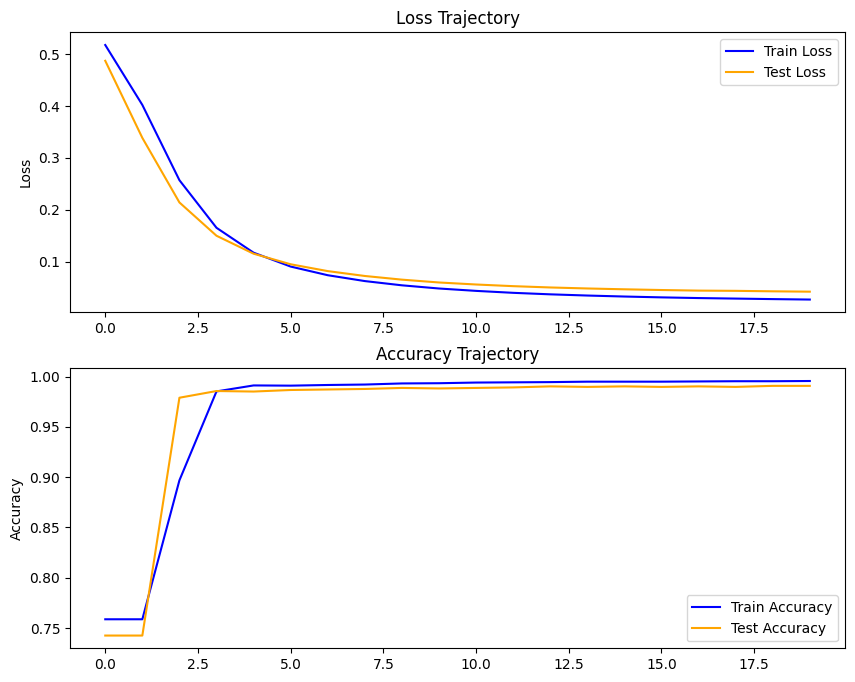

In [90]:
#This is where I plot the accuracy of both my training and test objects
train_loss = wine_history.history['loss']
test_loss = wine_history.history['val_loss']
train_accuracy = wine_history.history['accuracy']
test_accuracy = wine_history.history['val_accuracy']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Test Accuracy: %.3f' % acc)

**Comments:**
> According to the graph, it shows higher accuracy values which means it performs better, as the model is making more correct predictions.

# **2. Regression**

# **Dataset Explanation:**
This dataset determineS whether a person makes over $50K a year.Since the imbalance between classes isn't significant and both classes hold equal significance, it's typical to rely on classification accuracy or error to assess how well the model performs on this dataset.

In [91]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

%matplotlib inline


In [92]:
import pandas as pd

def get_data():
    train_data_path = '/content/drive/My Drive/Datasets/train.csv'
    train = pd.read_csv(train_data_path)

    test_data_path = '/content/drive/My Drive/Datasets/test.csv'
    test = pd.read_csv(test_data_path)

    return train, test

def get_combined_data():
    train, test = get_data()
    if 'occupation' in train.columns:
        target = train['educational-num']
        train.drop(['educational-num'], axis=1, inplace=True)
    else:
        raise ValueError("Column 'occupation' not found in train dataset!")

    combined = pd.concat([train, test], ignore_index=True)
    combined.reset_index(drop=True, inplace=True)

    return combined, target

train_data, test_data = get_data()
combined, target = get_combined_data()

print("Combined Data:")
print(combined.head())


Combined Data:
   age  workclass  fnlwgt     education      marital-status        occupation  \
0   67    Private  366425     Doctorate            Divorced   Exec-managerial   
1   17    Private  244602          12th       Never-married     Other-service   
2   31    Private  174201     Bachelors  Married-civ-spouse   Exec-managerial   
3   58  State-gov  110199       7th-8th  Married-civ-spouse  Transport-moving   
4   25  State-gov  149248  Some-college       Never-married     Other-service   

    relationship   race gender  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White   Male         99999             0              60   
1      Own-child  White   Male             0             0              15   
2        Husband  White   Male             0             0              40   
3        Husband  White   Male             0             0              40   
4  Not-in-family  Black   Male             0             0              40   

  native-country  income_>50K

In [93]:
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [94]:
combined.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income_>50K,educational-num
count,44856.000000,4.485600e+04,44856.000000,44856.000000,44856.000000,43957.000000,899.000000
mean,38.616328,1.897627e+05,1086.251583,88.721152,40.421995,0.239279,10.185762
std,13.721436,1.058047e+05,7519.761299,405.401776,12.400502,0.426648,2.477511
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,1.175288e+05,0.000000,0.000000,40.000000,0.000000,9.000000
50%,37.000000,1.782110e+05,0.000000,0.000000,40.000000,0.000000,10.000000
75%,48.000000,2.377540e+05,0.000000,0.000000,45.000000,0.000000,13.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000,1.000000,16.000000


In [95]:
#This makes sure that I don't have missing values on the columns of my dataset.
def get_cols_with_no_nans(df,col_type):
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [96]:
#This gets columns that doesn't have missing values.
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

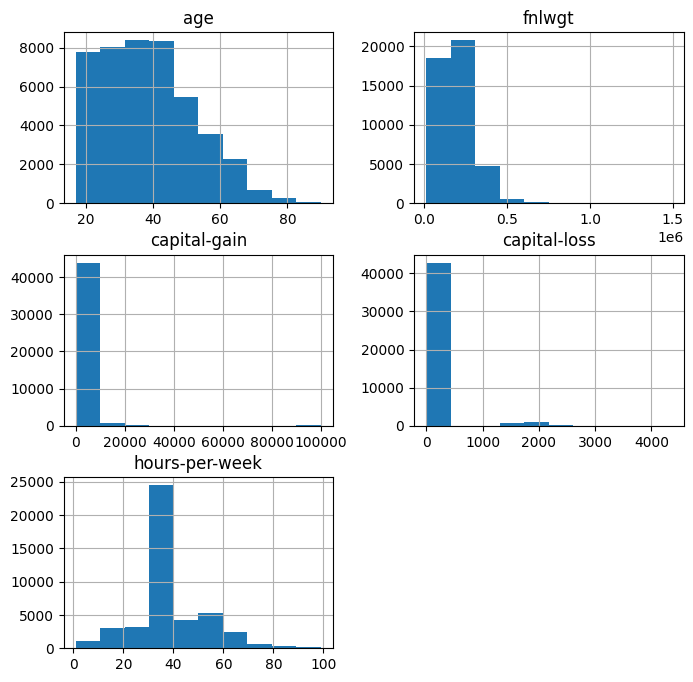

In [97]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (8,8))
plt.show()

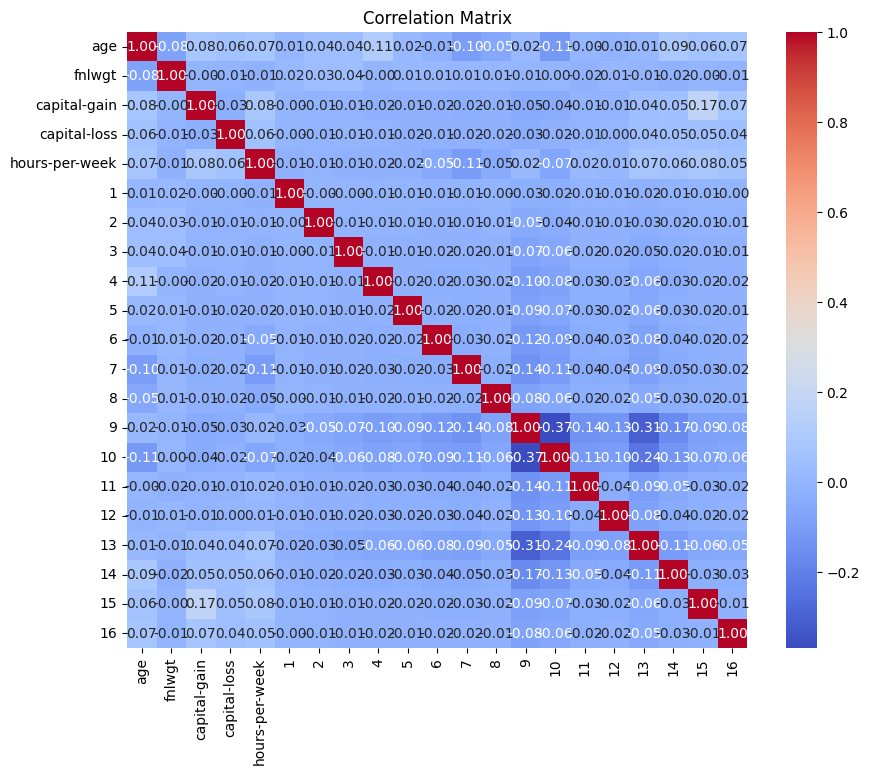

In [98]:
#This shows the correlation between the combined and chosen features.
numeric_train_data = train_data[num_cols]
encoded_occupation = pd.get_dummies(target)
numeric_train_data = pd.concat([numeric_train_data, encoded_occupation], axis=1)

C_mat = numeric_train_data.corr()

fig = plt.figure(figsize=(10, 8))
sns.heatmap(C_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [99]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [100]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 10 columns before encoding categorical features
There are 41 columns after encoding categorical features


In [101]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test

In [102]:
train, test = split_combined()

In [157]:
NN_model = Sequential()
NN_model.add(Dense(64, kernel_initializer='normal', input_dim=train.shape[1], activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(24, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(12, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])
NN_model.summary()

target = target.astype(np.float32)
train = train.astype(np.float32)

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.keras'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

history = NN_model.fit(train, target, epochs=30, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,873 (22.94 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.7568 - mse: 89.7568
Epoch 1: val_loss improved from inf to 89.91145, saving model to Weights-001--89.91145.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 89.6010 - mse: 89.6010 - val_loss: 89.9115 - val_mse: 89.9115
Epoch 2/30
28/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.0651 - mse: 88.0651   
Epoch 2: val_loss improved from 89.91145 to 89.91109, saving model to Weights-002--89.91109.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 88.2207 - mse: 88.2207 - val_loss: 89.9111 - val_mse: 89.9111
Epoch 3/30
25/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.7590 - mse: 89.7590  
Epoch 3: val_loss improved from 89.91109 to 89.91103, saving model to Weights-003--89.91103.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.4345 - mse: 89.4345 - val_loss: 89.9110 - val_mse: 89.9110
Epoch 4/30
23/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.9267 - mse: 86.9267 
Epoch 4: val_loss improved from 89.91103 to 89.91100,

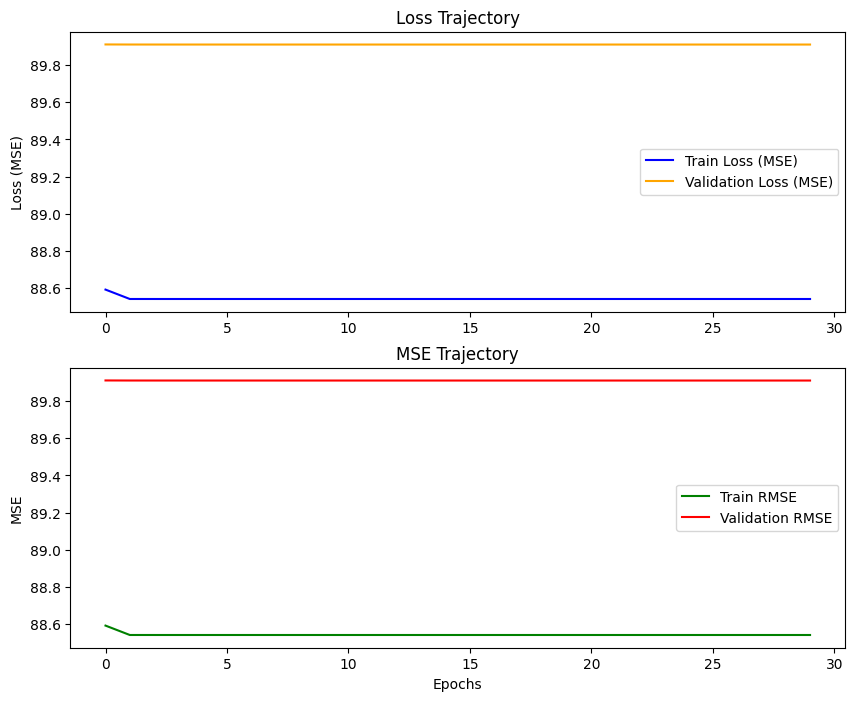

In [158]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['mse']
val_rmse = history.history['val_mse']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(train_loss, label='Train Loss (MSE)', color='blue')
axes[0].plot(val_loss, label='Validation Loss (MSE)', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()

axes[1].plot(train_rmse, label='Train RMSE', color='green')
axes[1].plot(val_rmse, label='Validation RMSE', color='red')
axes[1].set_title('MSE Trajectory')
axes[1].set_ylabel('MSE')
axes[1].legend()

plt.xlabel('Epochs')
plt.show()

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#small network (1 layer, 8 neurons)
small_model = create_nn_model(layers=1, neurons=8)
small_model.fit(X_train_std, y_train, epochs=10, batch_size=32, verbose=0)
small_predictions = small_model.predict(X_test_std)
small_mse = mean_squared_error(y_test, small_predictions)
small_mae = mean_absolute_error(y_test, small_predictions)
print("Small Model MSE:", small_mse)
print("Small Model MAE:", small_mae)

#large network (3 layers, 32 neurons each)
large_model = create_nn_model(layers=3, neurons=32)
large_model.fit(X_train_std, y_train, epochs=10, batch_size=32, verbose=0)
large_predictions = large_model.predict(X_test_std)
large_mse = mean_squared_error(y_test, large_predictions)
large_mae = mean_absolute_error(y_test, large_predictions)
print("Large Model MSE:", large_mse)
print("Large Model MAE:", large_mae)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Small Model MSE: 0.011306100259320113
Small Model MAE: 0.03061859100038605
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Large Model MSE: 0.004587891309025224
Large Model MAE: 0.007868365360849878


**Comments:**
> The MSE and MAE values represent how close the predicted values are to the actual values. Lower MSE and MAE values mean the predictions are closer to the real data, indicating better model accuracy. In this case, the larger model performs better than the smaller model, since it captures more details and patterns in the data and has lesser values than the smaller model.

In [161]:
%%shell
jupyter nbconvert --to html /content/Clarito_Assignment_7_1_Classifications_and_Regression.ipynb

[NbConvertApp] Converting notebook /content/Clarito_Assignment_7_1_Classifications_and_Regression.ipynb to html
[NbConvertApp] Writing 1188113 bytes to /content/Clarito_Assignment_7_1_Classifications_and_Regression.html
